
## How well do jobs and skills pay for Data Analysts?
Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

Original Exploration

[7_Matplotlib_Box_Plots.ipyn](2_Advance\17_Matplotlib_Box_Plots.ipynb)

[18_Exercise_Skill_Pay_Analysis.ipynb](2_Advance\18_Exercise_Skill_Pay_Analysis.ipynb)

### Import Libraries and Data

In [2]:
#importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x)else x)


c:\Users\siddh\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# filter for the job titles and country
df_India = df[(df['job_country'] == 'India')].dropna(subset=['salary_year_avg'])

In [4]:
job_titles = df_India['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

In [5]:
df_India_top6 = df_India[df_India['job_title_short'].isin(job_titles)]

In [6]:
job_order = df_India_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

<function matplotlib.pyplot.show(close=None, block=None)>

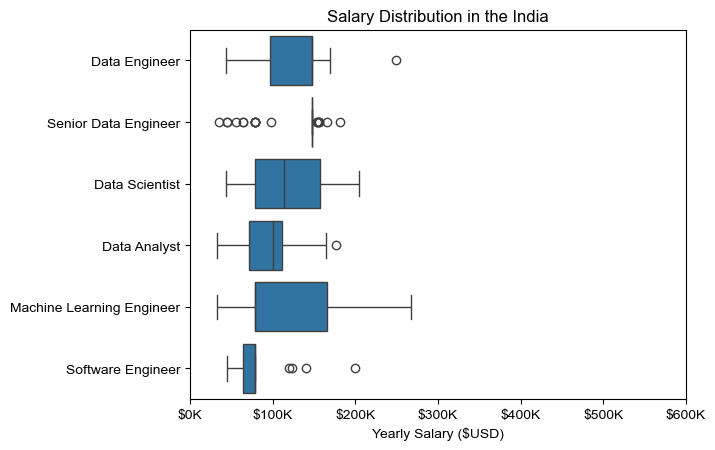

In [7]:
sns.boxplot(data=df_India_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the India')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show

## Investigate Median Salary Vs Skill for Data Analyst

In [9]:
df_DA_India = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()


df_DA_India = df_DA_India.dropna(subset='salary_year_avg')

In [12]:
df_DA_India = df_DA_India.explode('job_skills')

df_DA_India[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [25]:
df_DA_top_pay = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [20]:
df_DA_skills = df_DA_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10)

df_DA_skills

,count,median
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
power bi,17,111175.0
azure,15,93600.0
aws,12,79200.0
oracle,11,79200.0


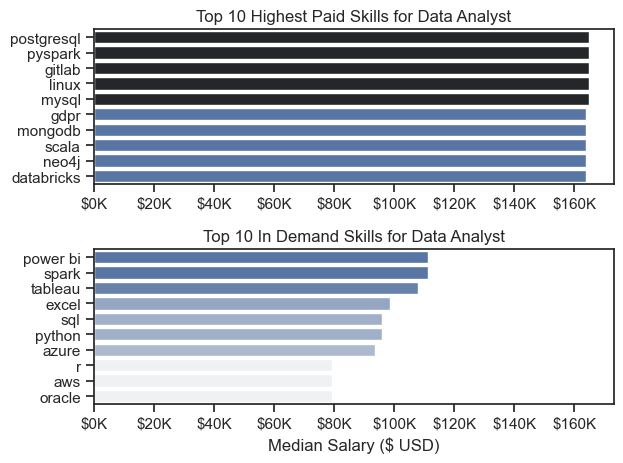

In [24]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style="ticks")

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))



# Sort the dataframe by median salary (descending)
df_DA_skills_sorted = df_DA_skills.sort_values(by='median', ascending=False)

sns.barplot(data=df_DA_skills_sorted, 
            x='median', 
            y=df_DA_skills_sorted.index, 
            ax=ax[1], 
            hue='median', 
            palette='light:b')

ax[1].legend().remove()
ax[1].set_title('Top 10 In Demand Skills for Data Analyst')
ax[1].set_xlabel('Median Salary ($ USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()
